In [17]:
import torch
import torchvision
import torch.nn as nn                           # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim                     # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F                 # All functions that don't have any parameters
from torch.utils.data import DataLoader         # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets         # Has standard datasets we can import in a nice way
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ruptures as rpt
import h5py

In [2]:
from torchvision import models

# SqueezeNet v1.1 불러오기 (v1.0도 선택 가능)
model = models.squeezenet1_1(pretrained=True)  # pretrained=False로 하면 무작위 가중치

C:\Users\moot1\miniconda3\envs\linear\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\moot1\miniconda3\envs\linear\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
from kymatio.torch import Scattering1D

df = pd.read_csv(r"C:\AIEEE\Prossessed_CardRF\Processed_CardRF\Train\UAV_Controller\DJI_INSPIRE.csv")

In [17]:
df.iloc[1, :1024].values

array([6504, 6324, 1832, ..., -4660, 1612, 6096], dtype=object)

In [24]:
scattering = Scattering1D(J=6, Q=8, shape=1024, oversampling=3)

In [25]:
x_np = df.iloc[0, :1024].values.astype(float)
x_tensor = torch.from_numpy(x_np).float().unsqueeze(0)   # (1, 1024)

In [26]:
scat = scattering(x_tensor)

In [27]:
scat.shape

torch.Size([1, 126, 128])

In [28]:
scat.view(126,128).shape

torch.Size([126, 128])

In [11]:
scat[0, -6**2:].shape

torch.Size([36, 16])

In [29]:
meta = scattering.meta()
order = meta['order']

In [30]:
order2_idx = (order==2)
scat_order2 = scat[0, order2_idx]
print(scat_order2.shape)

torch.Size([87, 128])


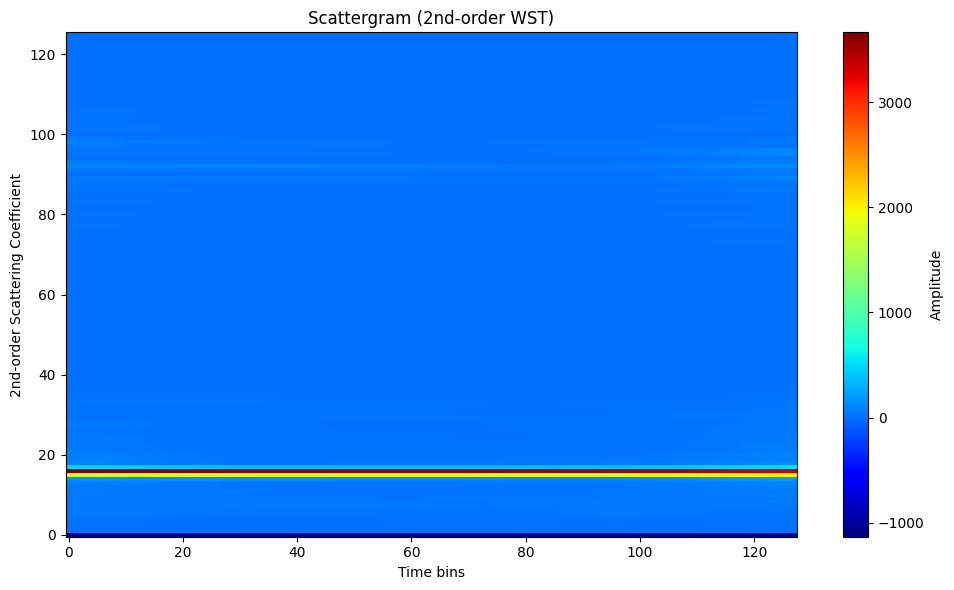

In [31]:
plt.figure(figsize=(10, 6))
plt.imshow(scat.view(126,128).numpy(), aspect='auto', cmap='jet', origin='lower')
plt.xlabel('Time bins')
plt.ylabel('2nd-order Scattering Coefficient')
plt.title('Scattergram (2nd-order WST)')
plt.colorbar(label='Amplitude')
plt.tight_layout()
plt.show()